In [1]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.9 MB/s eta 0:00:00


In [2]:
pip install kneed


# Importing Libraries

In [3]:
import numpy as np                     # For Numpy Arrays
import matplotlib.pyplot as plt        # Plotting
import pandas as pd                    # For dataframes and readCSV
import seaborn as sns                  # Plotting
from scipy import stats               # Statistical computations
import plotly.express as px           # Interactive visualization
from scipy.stats import zscore        # Z-score computation
from sklearn_extra.cluster import KMedoids   # K-Medoids clustering
from sklearn.metrics import silhouette_score # Silhouette score computation
from kneed import KneeLocator         # Knee point detection
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # Hierarchical clustering
import sys # System-specific parameters and functions
from sklearn.preprocessing import StandardScaler

import warnings                       # Ignore the warnings coming from plotting libraries
warnings.filterwarnings("ignore")

# Data Preparation

In [4]:
data = pd.read_csv('credit_card_data.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
print(f'Number of Duplicated Rows = {data.duplicated().sum()}')
print(f'Number of NA Rows at each column = \n{data.isna().sum()}')

# We found out that there are NA values in CREDIT_LIMIT, MINIMUM_PAYMENTS Columns

Number of Duplicated Rows = 0
Number of NA Rows at each column = 
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
# Dropping Missing Values
last_length = len(data)
data.dropna(inplace=True)
new_length = len(data)
removed = last_length - new_length
print(f"Dropped {removed} rows with N/A Values")

Dropped 314 rows with N/A Values


# Handling Outliers

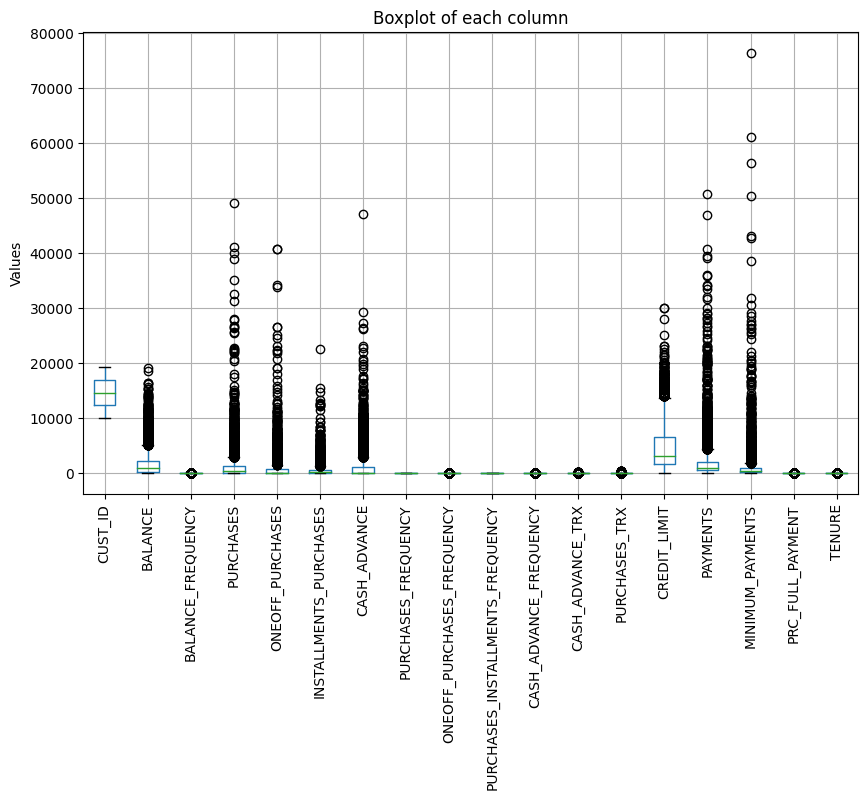

In [8]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot of each column')
plt.ylabel('Values')
plt.xticks(rotation = 90)
plt.show()

In [9]:
px.box(data_frame=data,x='PURCHASES',title='Box Plot')

In [10]:
px.box(data_frame=data,x='CREDIT_LIMIT',title='Box Plot')

In [11]:
def scan_outlier(data,x):
    q1 = data[x].quantile(.25)
    print(f"First Quantile is: {q1}")
    q3 = data[x].quantile(.75)
    print(f"Third Quantile is: {q3}")
    iqr = q3-q1
    print(f"IQR is: {iqr}")
    data['is_outlier'] = np.where(data[[x]]<(q1-1.5*iqr),1,
                                 np.where(data[[x]]>(q3+1.5*iqr),1,0))
    return data

In [12]:
scan_outlier(data,'CREDIT_LIMIT')

First Quantile is: 1600.0
Third Quantile is: 6500.0
IQR is: 4900.0


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,is_outlier
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8945,19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8947,19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [13]:
outliers = data["is_outlier"]==1
print(f"Number of Outliers = {sum(outliers)}")

Number of Outliers = 243


In [14]:
# Dropping Outliers
# Dropping Missing Values
last_length = len(data)

data = data[data['is_outlier'] == 0]
data = data.drop(columns='is_outlier',axis=1)

new_length = len(data)
removed = last_length - new_length
print(f"Dropped {removed} rows with Outliers Values")
data

Dropped 243 rows with Outliers Values


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Checking False Data

In [15]:
# PURCHASES Column is the Sum of ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES
# If the sum of them != PURCHASES --> That means this row has something wrong so we will drop it

last_length = len(data)

data["Total_Purchases"] = data['ONEOFF_PURCHASES'] + data['INSTALLMENTS_PURCHASES']
data = data[data['Total_Purchases'].astype(int)==data['PURCHASES'].astype(int)]
data = data.drop(columns='Total_Purchases',axis=1)

new_length = len(data)
removed = last_length - new_length
print(f"Dropped {removed} rows with False Purchases Values")

data

Dropped 18 rows with False Purchases Values


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# EDA

In [16]:
data.drop(columns='CUST_ID',axis=1,inplace=True)
data.reset_index(drop=True, inplace=True)
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000
mean,1494.118373,0.894410,927.923033,538.728159,389.194874,953.759037,0.491402,0.199519,0.365318,0.136764,3.278925,14.345313,4173.722762,1636.188583,837.568714,0.156358,11.526448
std,1843.965938,0.208149,1707.583443,1315.108160,772.448559,1948.385788,0.400884,0.294489,0.397355,0.200248,6.777684,23.512741,3044.048148,2382.320147,2363.853944,0.292870,1.321764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,144.474653,0.909091,37.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,409.404867,168.444460,0.000000,12.000000
50%,902.099225,1.000000,363.380000,35.090000,89.800000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,867.534492,307.918918,0.000000,12.000000
75%,2010.195552,1.000000,1093.125000,560.280000,464.805000,1113.138205,0.916667,0.272727,0.750000,0.250000,4.000000,17.000000,6000.000000,1871.414153,789.492571,0.166667,12.000000
max,12373.333480,1.000000,35131.160000,34087.730000,14686.100000,27296.485760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,13600.000000,39461.965800,76406.207520,1.000000,12.000000


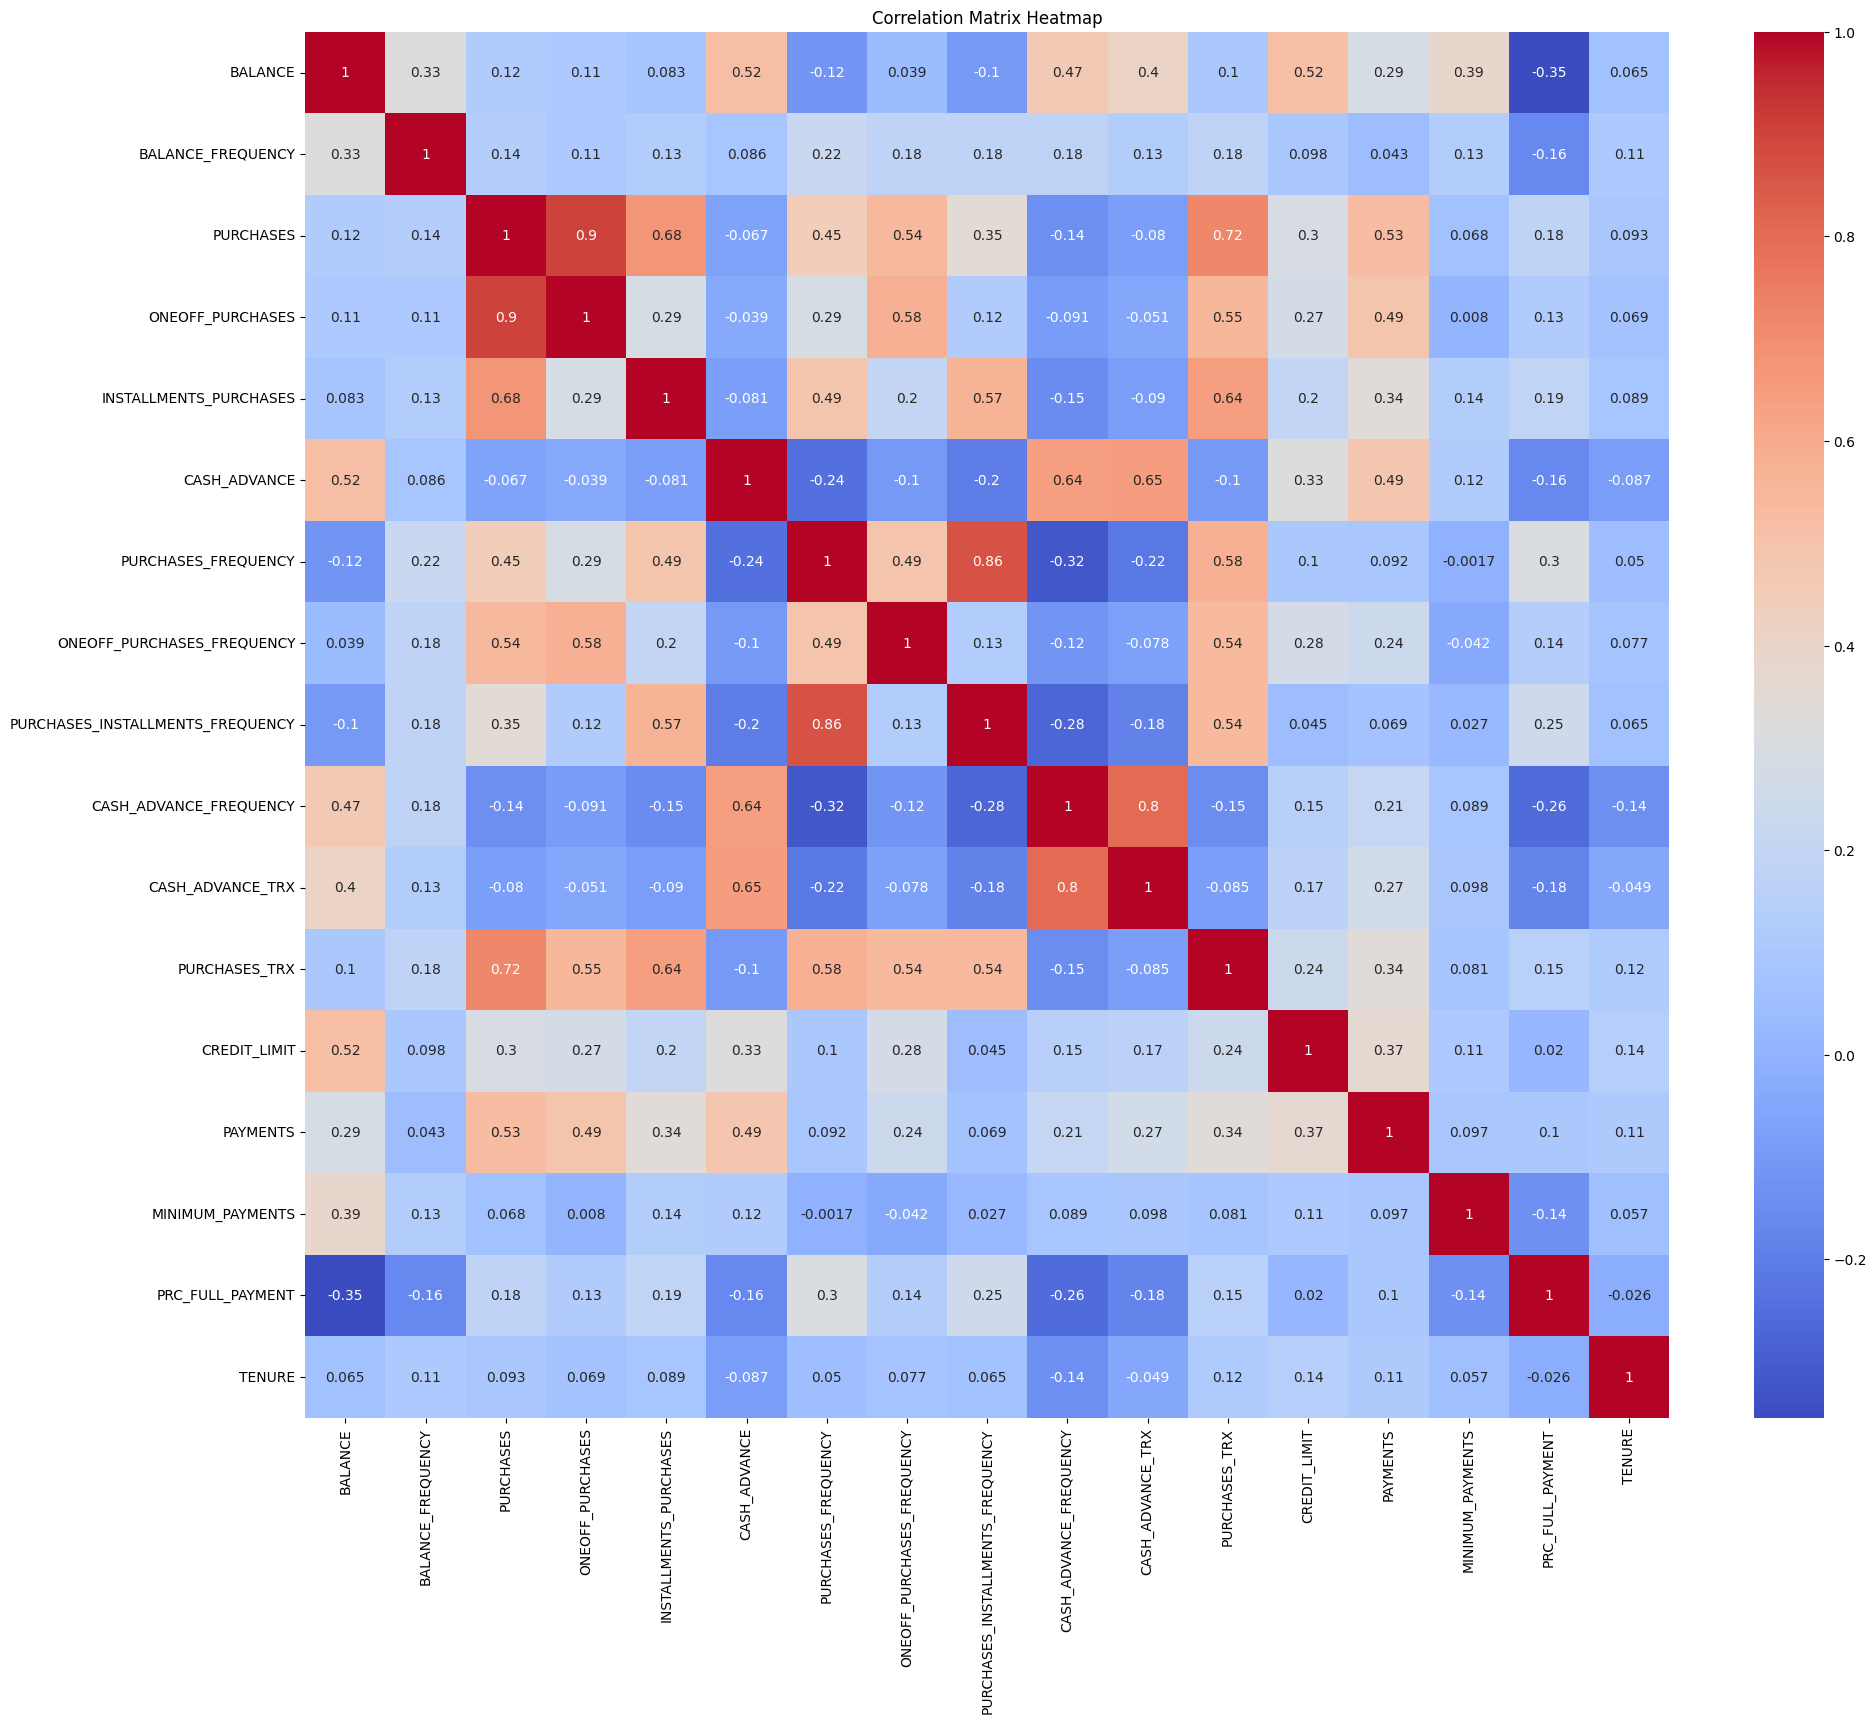

In [17]:
# Plot a correlation matrix heatmap
plt.figure(figsize=(22, 18))
# annot=True displays the correlation values on the heatmap
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# K Medoids

In [18]:
#normalize all features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [19]:
interia_list = []
silhouette_coefficients = []

for k in range(2,11):
    print(f"Working with k = {k}")
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state =17)
    kmedoids.fit(scaled_features)
    interia_list.append(kmedoids.inertia_)
    score = silhouette_score(scaled_features, kmedoids.labels_)
    silhouette_coefficients.append(score)

Working with k = 2
Working with k = 3
Working with k = 4
Working with k = 5
Working with k = 6
Working with k = 7
Working with k = 8
Working with k = 9
Working with k = 10


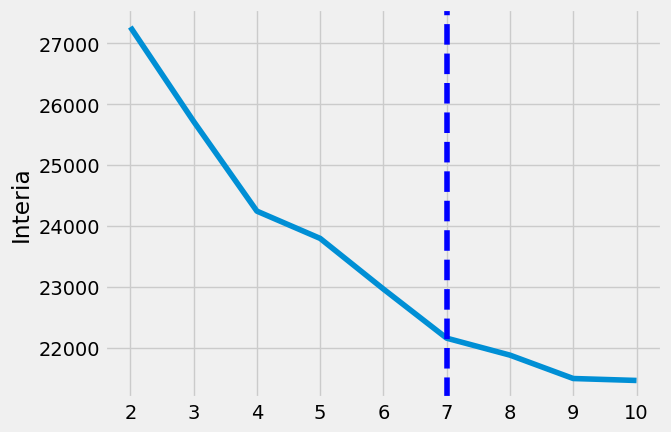

In [20]:
kl = KneeLocator(range(2,11), interia_list, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),interia_list)
plt.xticks(range(2,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()

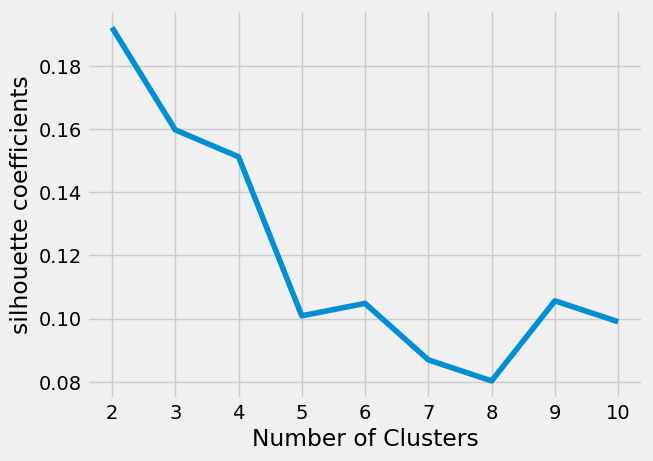

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

So we will test when number of clusters = 2 and 7

# K Medoids - K = 2

In [22]:
kmediods = KMedoids(n_clusters=2,init= "random", random_state = 17)
kmediods.fit(scaled_features)
labels = kmediods.labels_

cluster_centers = pd.DataFrame(data = kmediods.cluster_centers_, columns = [data.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2099.383560,1.0,556.52,537.00,19.52,1008.781338,0.166667,0.083333,0.083333,0.166667,4.0,2.0,3000.0,1100.700834,757.724201,0.00,12.0
1,109.473217,1.0,1251.26,635.79,615.47,0.000000,0.833333,0.250000,0.666667,0.000000,0.0,19.0,2700.0,958.931815,187.560093,0.25,12.0


In [23]:
data_2_clusters = pd.concat([data, pd.DataFrame({'cluster': labels})], axis = 1)
data_2_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8371,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8372,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8373,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


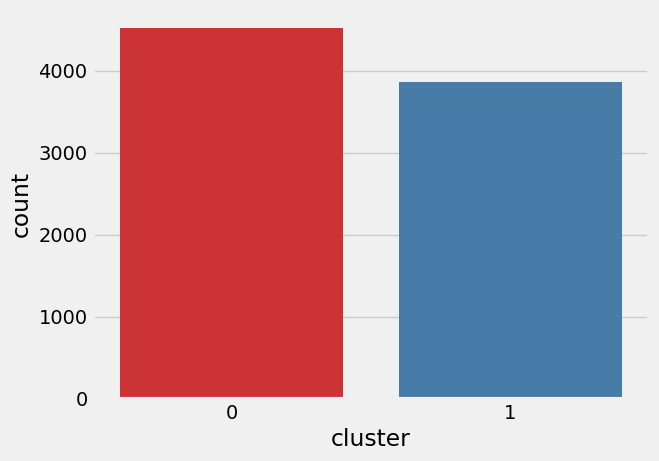

In [24]:
# counting number of clusters
sns.countplot(x=data_2_clusters.cluster,palette='Set1')
plt.show()

[[2.09938356e+03 1.00000000e+00 5.56520000e+02 5.37000000e+02
  1.95200000e+01 1.00878134e+03 1.66667000e-01 8.33330000e-02
  8.33330000e-02 1.66667000e-01 4.00000000e+00 2.00000000e+00
  3.00000000e+03 1.10070083e+03 7.57724201e+02 0.00000000e+00
  1.20000000e+01]
 [1.09473217e+02 1.00000000e+00 1.25126000e+03 6.35790000e+02
  6.15470000e+02 0.00000000e+00 8.33333000e-01 2.50000000e-01
  6.66667000e-01 0.00000000e+00 0.00000000e+00 1.90000000e+01
  2.70000000e+03 9.58931815e+02 1.87560093e+02 2.50000000e-01
  1.20000000e+01]]


Text(50.44508101851852, 0.5, 'PURCHASES_TRX')

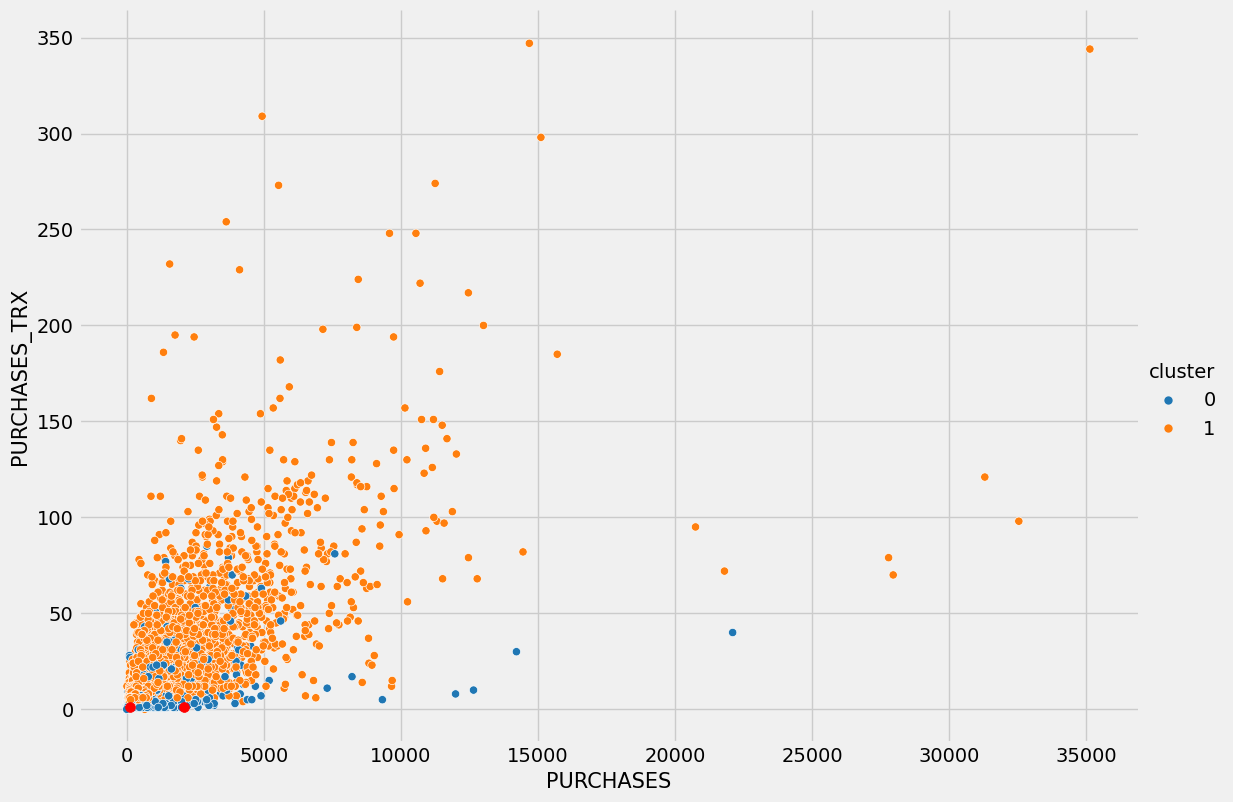

In [25]:
###########################

centroids = kmediods.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)

sns.relplot(data = data_2_clusters,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)


In [26]:
z1 = linkage(scaled_features,method='single',metric='euclidean')
z2 = linkage(scaled_features,method='complete',metric='euclidean')
z3 = linkage(scaled_features,method='average',metric='euclidean')
z4 = linkage(scaled_features,method='ward',metric='euclidean')


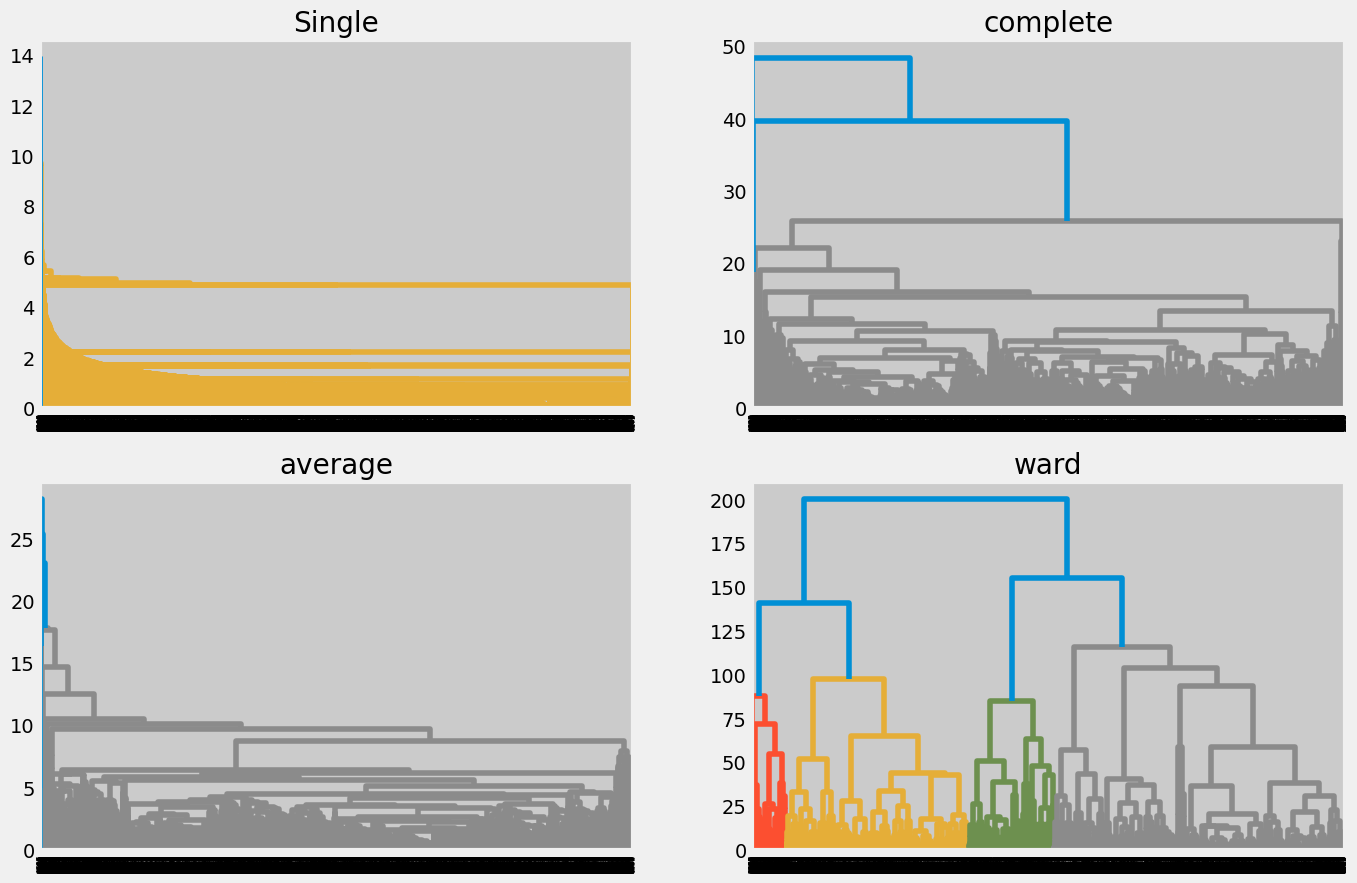

In [27]:
sys.setrecursionlimit(10000)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1), dendrogram(z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(z2), plt.title('complete')
plt.subplot(2,2,3), dendrogram(z3), plt.title('average')
plt.subplot(2,2,4), dendrogram(z4), plt.title('ward')
plt.show()

In [28]:
silhouette_coefficients = []

for method, Z in zip(['single', 'complete', 'average', 'ward'], [z1, z2, z3, z4]):
    labels = fcluster(Z, t=kl.elbow, criterion='maxclust')
    score = silhouette_score(scaled_features, labels)
    silhouette_coefficients.append(score)


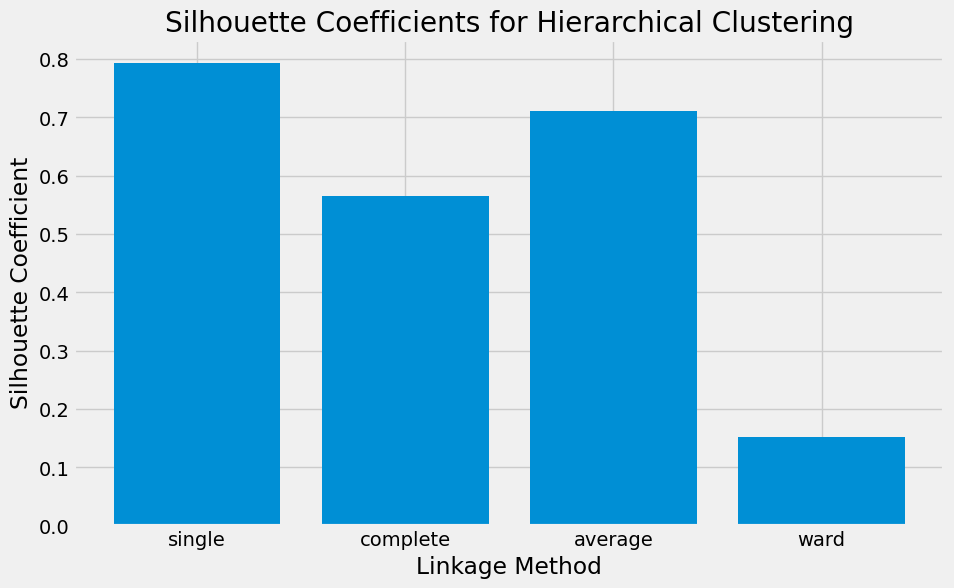

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(['single', 'complete', 'average', 'ward'], silhouette_coefficients)
plt.xlabel('Linkage Method')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficients for Hierarchical Clustering')
plt.show()

KMedoids Cluster Composition:
              CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
cluster                                                              
0.0      14248.522904  1712.917062           0.905652  1051.142810   
1.0      14395.088740  1620.278821           0.895100  1068.237745   

         ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
cluster                                                           
0.0            622.290992              429.021988   1042.965835   
1.0            638.568450              430.118000    980.497692   

         PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
cluster                                                    
0.0                  0.48972                    0.212793   
1.0                  0.49939                    0.213549   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
cluster                                                             
0.0                              0.361243

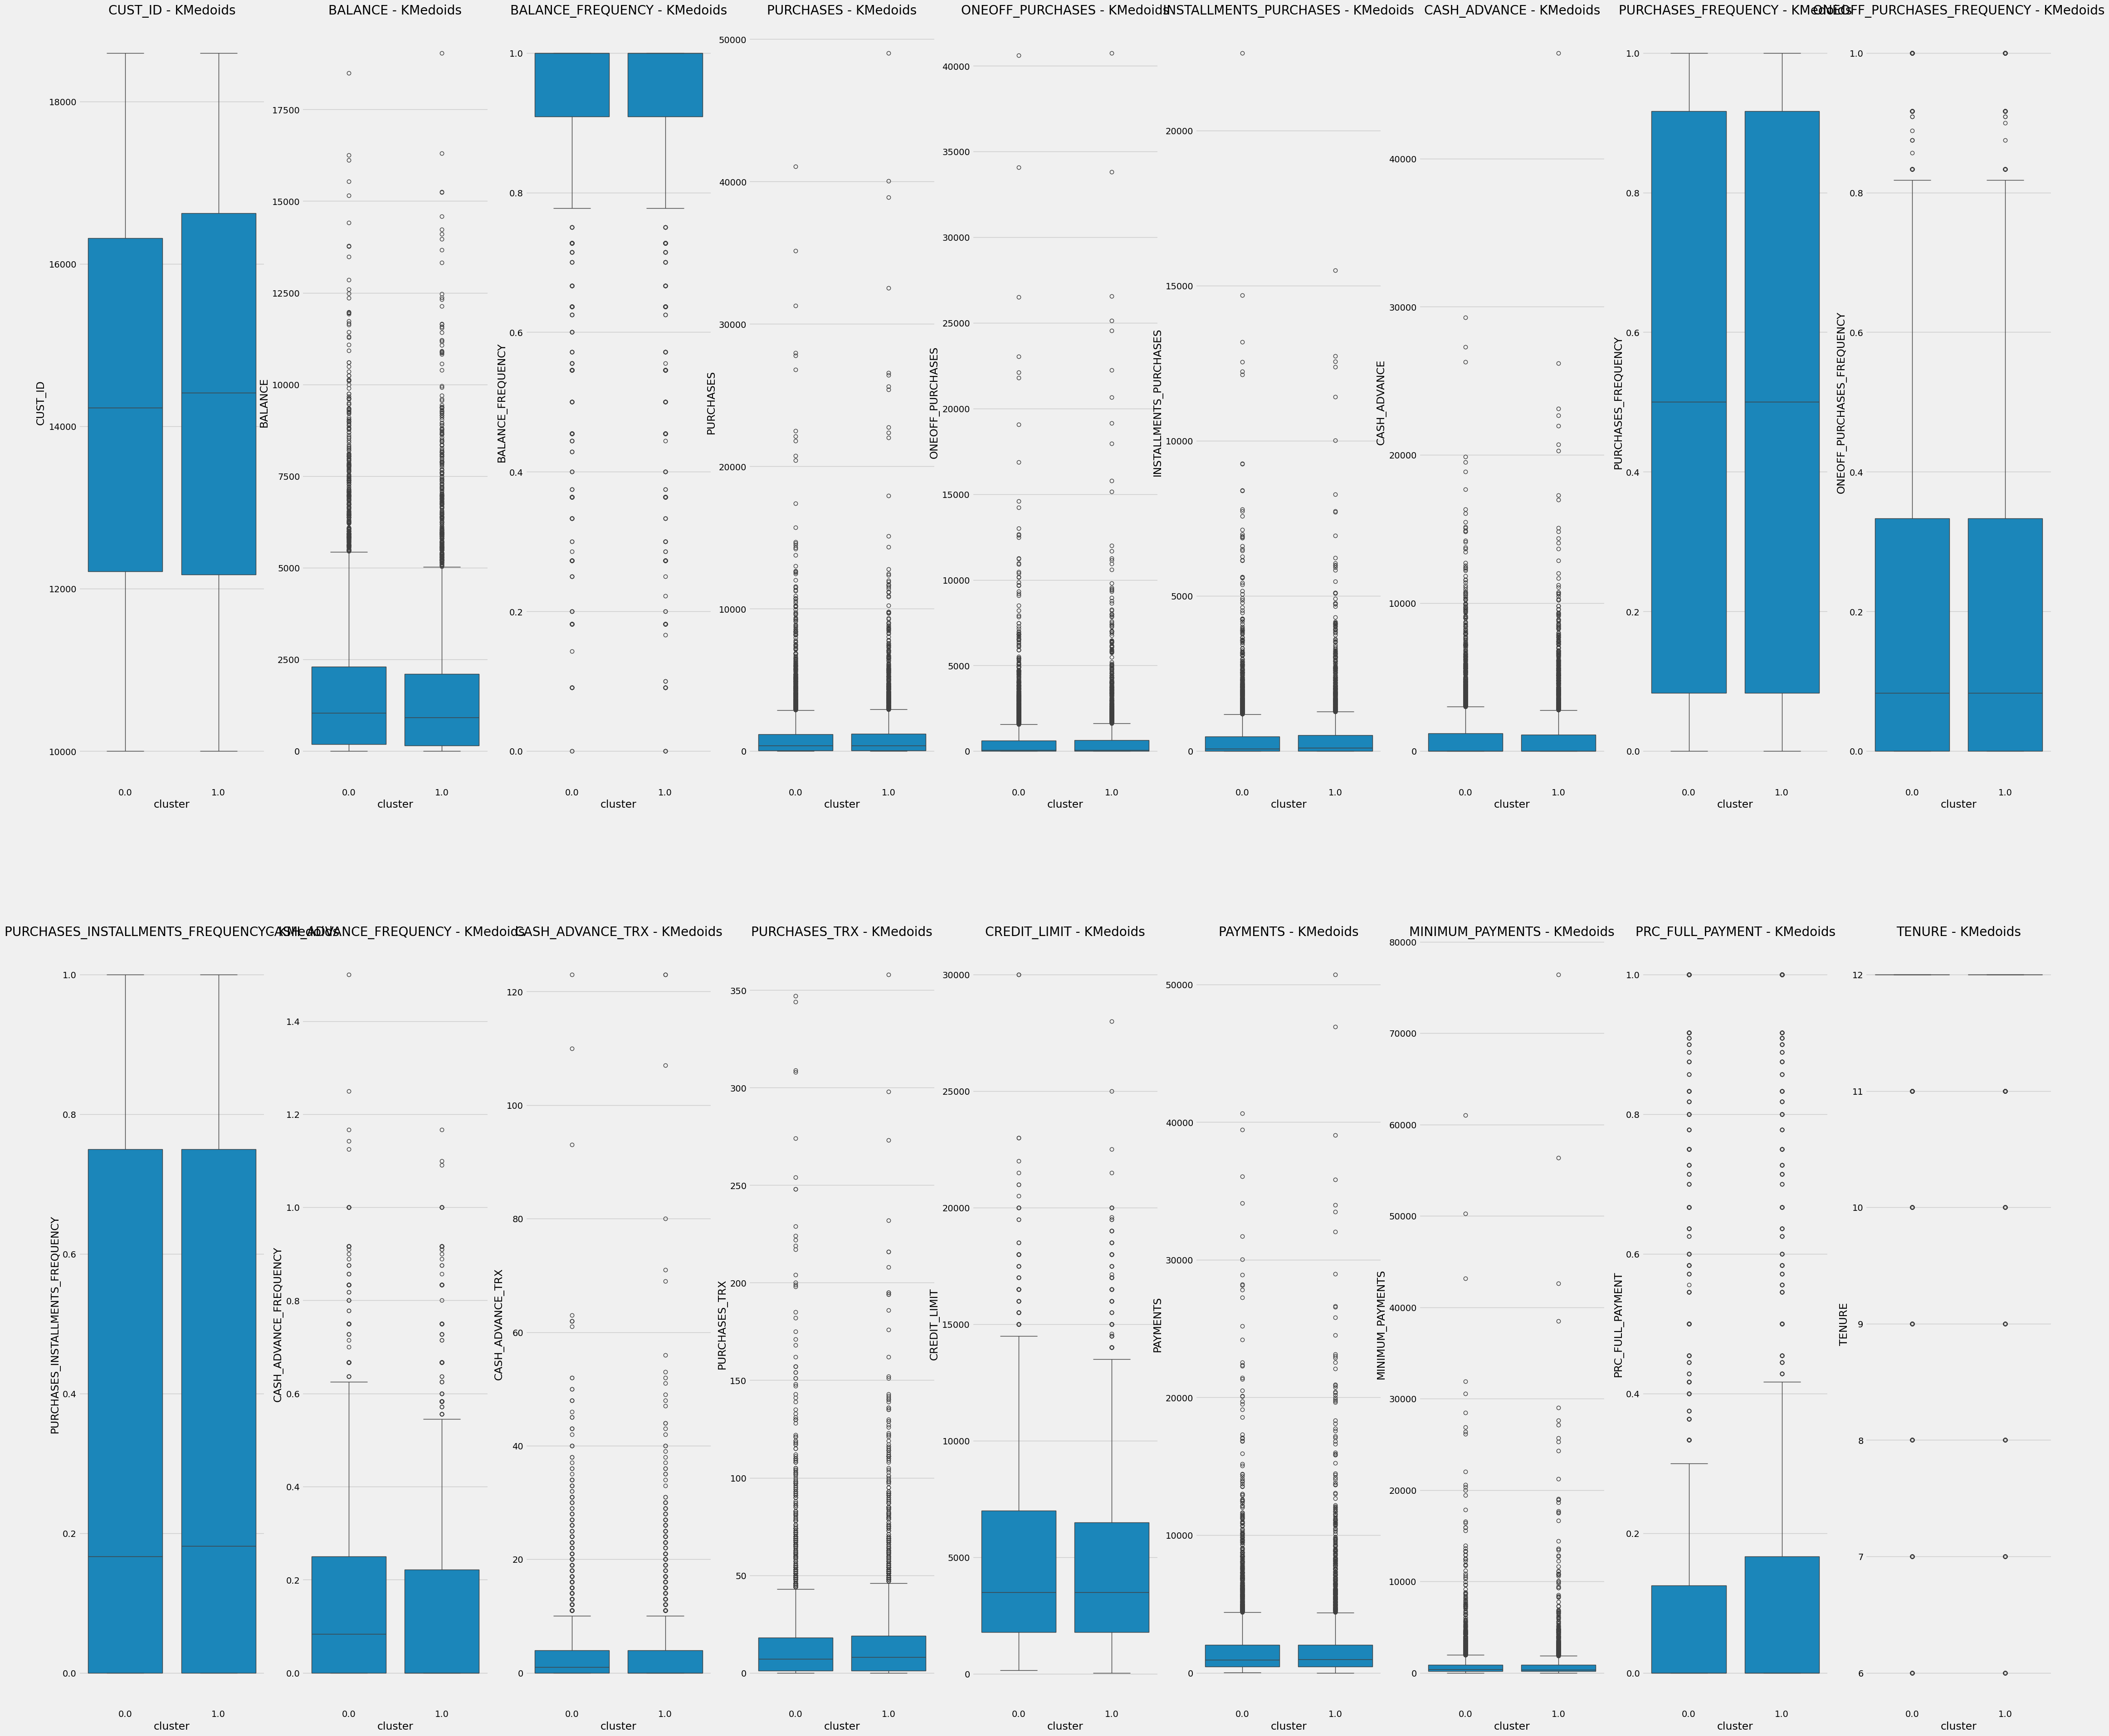

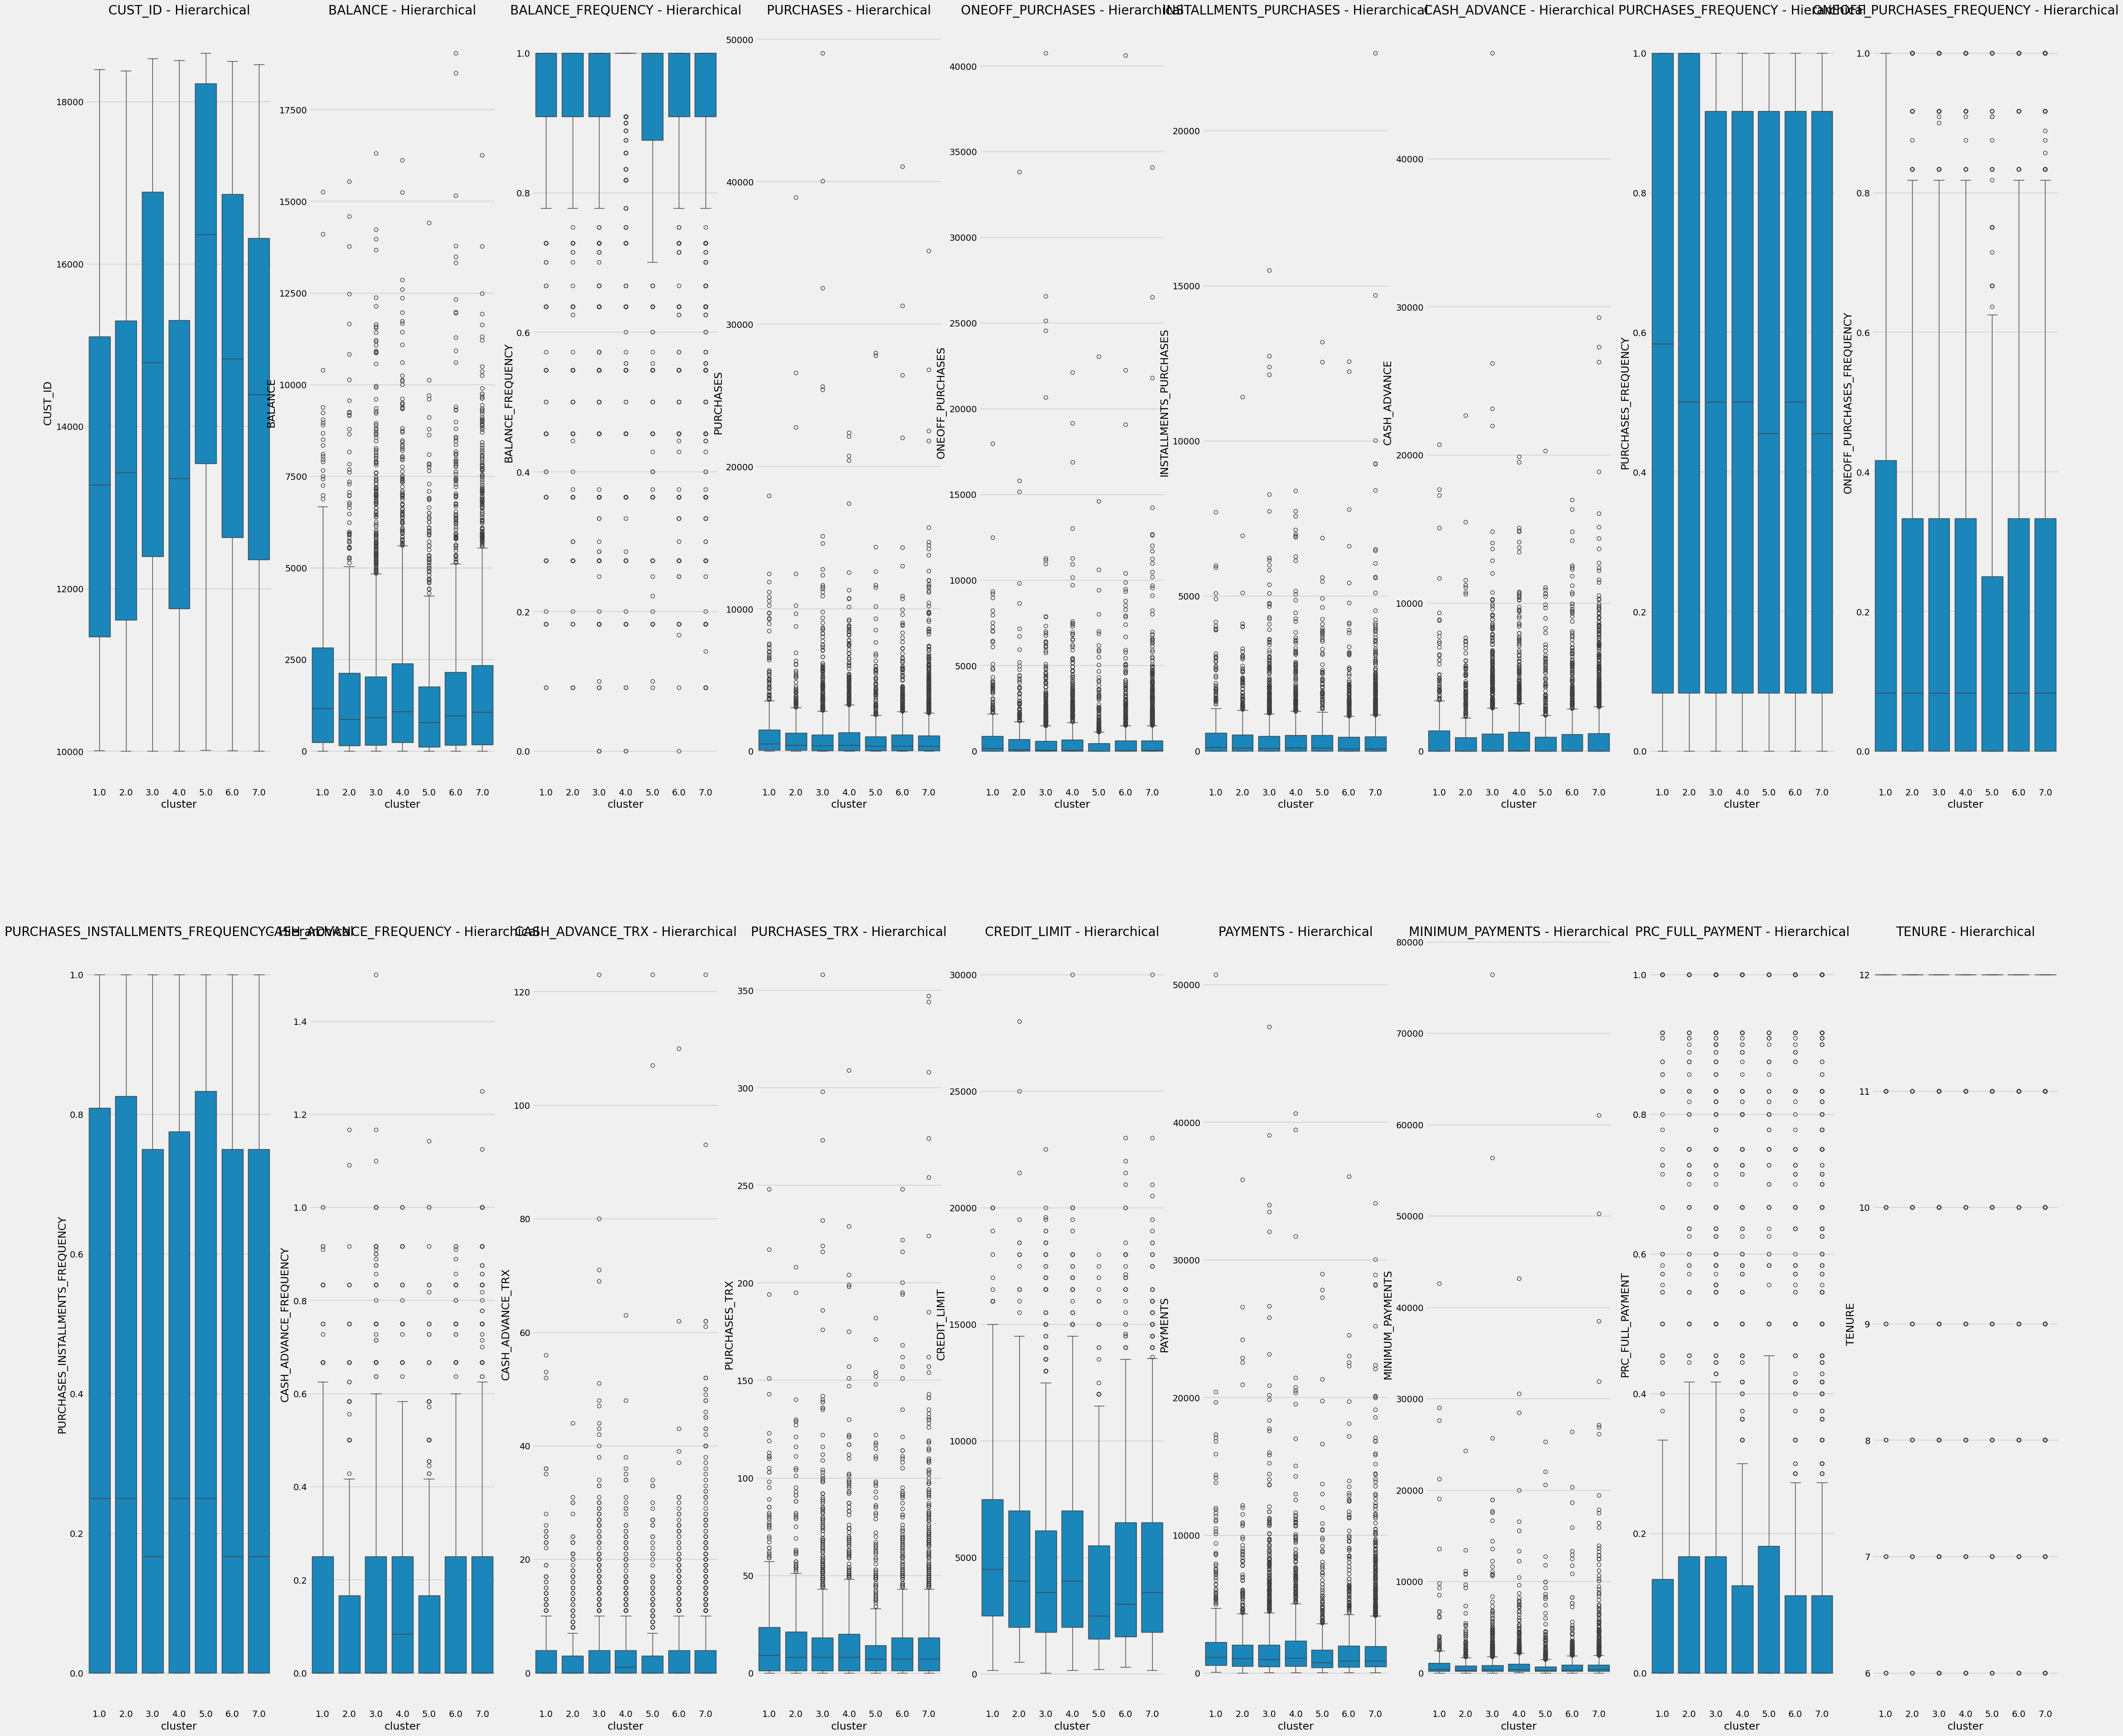

Silhouette Score - KMedoids: 0.1922112986789933
Silhouette Score - Hierarchical: 0.15138029755826743


In [35]:
# Extract cluster assignments from KMedoids
kmedoids_labels = kmediods.labels_

# Extract cluster assignments from hierarchical clustering (using the chosen linkage method and number of clusters)
hierarchical_labels = fcluster(z4, t=kl.elbow, criterion='maxclust')

# Create a DataFrame combining original data with cluster labels
kmedoids_clusters = pd.concat([data, pd.DataFrame({'cluster': kmedoids_labels})], axis=1)
hierarchical_clusters = pd.concat([data, pd.DataFrame({'cluster': hierarchical_labels})], axis=1)

# Analyze cluster composition for KMedoids clustering
kmedoids_cluster_composition = kmedoids_clusters.groupby('cluster').mean()  # You can use other aggregation functions like median

# Analyze cluster composition for hierarchical clustering
hierarchical_cluster_composition = hierarchical_clusters.groupby('cluster').mean()

# Compare cluster characteristics
print("KMedoids Cluster Composition:")
print(kmedoids_cluster_composition)
print("\nHierarchical Clustering Cluster Composition:")
print(hierarchical_cluster_composition)

# Visualize cluster characteristics (for example, using box plots)
plt.figure(figsize=(50, 46))
num_cols = len(data.columns) // 2
num_rows = 2 if len(data.columns) % 2 == 0 else 3  # Adjust the number of rows based on the number of columns

for i, col in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=kmedoids_clusters, x='cluster', y=col)
    plt.title(col + ' - KMedoids')
plt.show()

plt.figure(figsize=(50, 46))
for i, col in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=hierarchical_clusters, x='cluster', y=col)
    plt.title(col + ' - Hierarchical')
plt.show()



# Evaluate cluster quality using silhouette score

silhouette_kmedoids = silhouette_score(scaled_features, kmedoids_labels)
silhouette_hierarchical = silhouette_score(scaled_features, hierarchical_labels)

print("Silhouette Score - KMedoids:", silhouette_kmedoids)
print("Silhouette Score - Hierarchical:", silhouette_hierarchical)


## Comparing between IQR and Z_score


Summary Statistics before Outlier Removal:
Mean: 4522.091029563802
Median: 3000.0
Standard Deviation: 3659.240379277939
Range (Min, Max): (50.0, 30000.0)

Summary Statistics after Outlier Removal (IQR Method):
Mean: 4173.171468046347
Median: 3000.0
Standard Deviation: 3044.213723941895
Range (Min, Max): (50.0, 13600.0)

Summary Statistics after Outlier Removal (Z-score Method):
Mean: 4024.607065087622
Median: 3000.0
Standard Deviation: 2958.8774478377964
Range (Min, Max): (50.0, 15000.0)



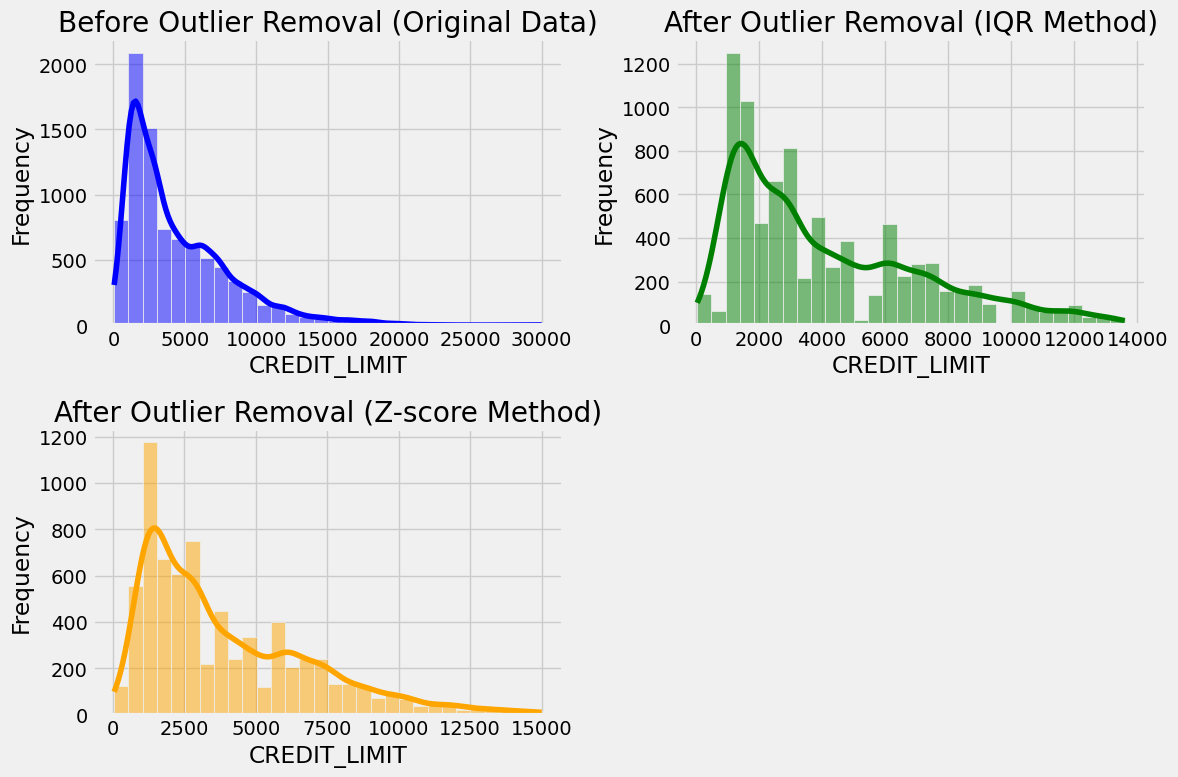

In [33]:
# Outlier removal using IQR
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Outlier removal using z-score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return data[(z_scores < threshold).all(axis=1)]

# Apply outlier removal using IQR and z-score
data_iqr = data.copy()
data_iqr = remove_outliers_iqr(data_iqr, 'CREDIT_LIMIT')

data_zscore = data.copy()
data_zscore = remove_outliers_zscore(data_zscore)

# Plot histograms before and after outlier removal
plt.figure(figsize=(12, 8))
# Print summary statistics before outlier removal
print("Summary Statistics before Outlier Removal:")
print("Mean:", data['CREDIT_LIMIT'].mean())
print("Median:", data['CREDIT_LIMIT'].median())
print("Standard Deviation:", data['CREDIT_LIMIT'].std())
print("Range (Min, Max):", (data['CREDIT_LIMIT'].min(), data['CREDIT_LIMIT'].max()))
print()

# Summary statistics after outlier removal using IQR method
print("Summary Statistics after Outlier Removal (IQR Method):")
print("Mean:", data_iqr['CREDIT_LIMIT'].mean())
print("Median:", data_iqr['CREDIT_LIMIT'].median())
print("Standard Deviation:", data_iqr['CREDIT_LIMIT'].std())
print("Range (Min, Max):", (data_iqr['CREDIT_LIMIT'].min(), data_iqr['CREDIT_LIMIT'].max()))
print()

# Summary statistics after outlier removal using z-score method
print("Summary Statistics after Outlier Removal (Z-score Method):")
print("Mean:", data_zscore['CREDIT_LIMIT'].mean())
print("Median:", data_zscore['CREDIT_LIMIT'].median())
print("Standard Deviation:", data_zscore['CREDIT_LIMIT'].std())
print("Range (Min, Max):", (data_zscore['CREDIT_LIMIT'].min(), data_zscore['CREDIT_LIMIT'].max()))
print()

# Before outlier removal
plt.subplot(2, 2, 1)
sns.histplot(data['CREDIT_LIMIT'], bins=30, kde=True, color='blue')
plt.title('Before Outlier Removal (Original Data)')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Frequency')

# After outlier removal using IQR
plt.subplot(2, 2, 2)
sns.histplot(data_iqr['CREDIT_LIMIT'], bins=30, kde=True, color='green')
plt.title('After Outlier Removal (IQR Method)')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Frequency')

# After outlier removal using z-score
plt.subplot(2, 2, 3)
sns.histplot(data_zscore['CREDIT_LIMIT'], bins=30, kde=True, color='orange')
plt.title('After Outlier Removal (Z-score Method)')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
